In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Importando dataset, Especificamente:

- Temperature (AT) in the range 1.81°C and 37.11°C,
- Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
- Relative Humidity (RH) in the range 25.56% to 100.16%
- Exhaust Vacuum (V) in teh range 25.36-81.56 cm Hg

Se espera predecir (variable Y)
- Net hourly electrical energy output (EP) 420.26-495.76 MW








In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

datos = pd.read_excel('/content/drive/My Drive/Colab Notebooks/CyclePowerPlantDataSet.xlsx')
datos.head()

Mounted at /content/drive


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


Analisis de que información del dataset esta vacio, Se organiza la informacion en funcion del false (información faltante)



In [5]:
total = datos.isnull().sum().sort_values(ascending=False)
percent_1 = datos.isnull().sum()/datos.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(datos.size)

,Total,%
PE,0,0.0
RH,0,0.0
AP,0,0.0
V,0,0.0
AT,0,0.0


In [6]:
datos.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [7]:
datos.corr(method="spearman")

,AT,V,AP,RH,PE
AT,1.000000,0.850620,-0.518790,-0.542706,-0.944412
V,0.850620,1.000000,-0.426129,-0.304938,-0.883702
AP,-0.518790,-0.426129,1.000000,0.086776,0.542531
RH,-0.542706,-0.304938,0.086776,1.000000,0.389640
PE,-0.944412,-0.883702,0.542531,0.389640,1.000000


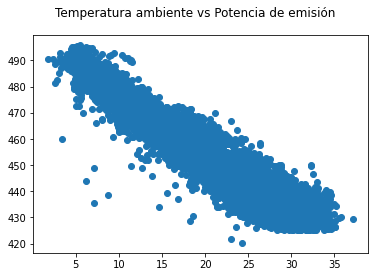

In [22]:
plt.suptitle('Temperatura ambiente vs Potencia de emisión')
plt.scatter(datos['AT'],datos['PE'])
plt.show()

Dividir el dataset:

Si tengo certeza que la informacion requerida esta acomodada, lo mas usual es dividir el dataset en 2 conjuntos, uno para el entrenamiento y otro para la validacion (se sugiere una división 70-30 u 80-20)

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(datos[['AT']], datos[['PE']], test_size = 0.2, random_state = 0)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7654, 1)
(1914, 1)
(7654, 1)
(1914, 1)


Entrenando el modelo de regresión lineal

In [24]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
prediccion = regressor.predict(X_test)
print(prediccion)
print("\nPendiente:\n",regressor.coef_)
print("\nIntercepto:\n",regressor.intercept_)

[[434.76410847]
 [459.05380424]
 [464.74602275]
 ...
 [470.43824126]
 [437.7622999 ]
 [459.48832474]]

Pendiente:
 [[-2.17260248]]

Intercepto:
 [497.03089567]


In [25]:
y_pred = regressor.predict(X_test)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

5.272562059337883

Recuerden que toda regresión lineal simple parte de la ecuación de la recta

$Y = coef * x + intercept$


In [26]:
ecuacion = datos[['AT']].dot(regressor.coef_) + regressor.intercept_
print(ecuacion.shape)
print(datos['AT'].shape)

(9568, 1)
(9568,)


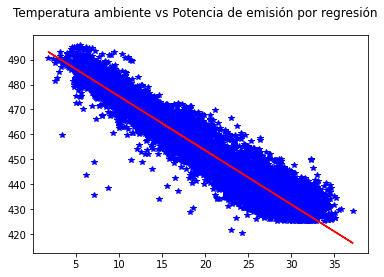

In [27]:
plt.suptitle('Temperatura ambiente vs Potencia de emisión por regresión')
plt.plot(datos[['AT']],datos['PE'],'*b')
plt.plot(datos[['AT']],ecuacion,'-r')
plt.show()